In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath("..\\.."))
from objects.ThreeQbCode import ThreeQbCodeCircuit

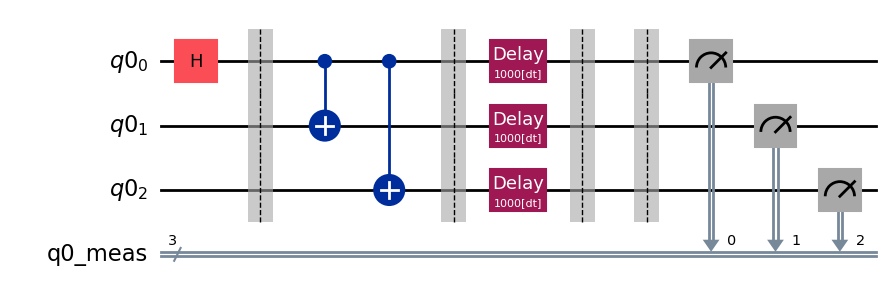

In [2]:
def load_circuit(delay, qb_len=1):
    qc = ThreeQbCodeCircuit(qb_len, type='bit_flip')

    qc.initial_state(state='+')
    qc.encode()
    # qc.x() # activar para probar el estado 1 logico
    qc.delay(delay)
    qc.measure_all(basis='Z')

    return qc

qc = load_circuit(1000, qb_len=1)
qc.draw('mpl')

In [3]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [4]:
phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')

Circuit Depth: 5
Transpiled Circuit Depth: 16


In [5]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [6]:
# best_T1_qubits = get_best_qubits(data_csv, lambda x: x.T1, 10)
# print(*[f"{q.Qubit}, T1={round(q.T1, 3)}" for q in best_T1_qubits], sep= '\n')

In [11]:
# t_array = [t*10_000 for t in range(0, 21)]
t_array = [t*8_000 for t in range(0, 11)]
print([round(t*dt * 10**(-3),2) for t in t_array])

[0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0]


In [15]:
circuits = []

for t in t_array:

    qc = load_circuit(t, qb_len=1)

    isa_circuit = transpile(qc.physical_circuit, backend, scheduling_method="asap", optimization_level=3
                            , initial_layout=[32, 36, 31])
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} μs")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
    # c.draw(output='mpl')

Circuit Depth: 15
Delay Duration: 0.0 μs
Total Duration: 2.86 μs

Circuit Depth: 16
Delay Duration: 4.0 μs
Total Duration: 6.86 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 16
Delay Duration: 8.0 μs
Total Duration: 10.86 μs

Circuit Depth: 16
Delay Duration: 12.0 μs
Total Duration: 14.86 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 16
Delay Duration: 16.0 μs
Total Duration: 18.86 μs

Circuit Depth: 16
Delay Duration: 20.0 μs
Total Duration: 22.86 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 16
Delay Duration: 24.0 μs
Total Duration: 26.86 μs

Circuit Depth: 16
Delay Duration: 28.0 μs
Total Duration: 30.86 μs

Circuit Depth: 16
Delay Duration: 32.0 μs
Total Duration: 34.86 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 16
Delay Duration: 36.0 μs
Total Duration: 38.86 μs

Circuit Depth: 16
Delay Duration: 40.0 μs
Total Duration: 42.86 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_25820\3018765259.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


In [17]:
def get_layout(circuit, qb_len=1):
    layout = circuit._layout.initial_layout.get_virtual_bits()
    # print(layout)
    keys = [layout[i] for i in layout]
    return keys[:qb_len]

# for c in circuits:
#     print(get_layout(c, qb_len=3))

In [18]:
def sampler_simulation(circuit, samples):

    from qiskit_aer.primitives import SamplerV2

    exact_sampler = SamplerV2()

    # Transpilamos el circuito
    pass_manager = generate_preset_pass_manager(3, AerSimulator())
    isa_circuit = pass_manager.run(circuit)

    # Corremos el circuito:
    pub = (isa_circuit, None, samples) # Notemos que tambien funciona si le pasamos el circuito qc
    job = exact_sampler.run([pub])

    result = job.result()
    pub_result = result[0]

    for lq in qc.qubits:

        state = lq.qb_measures
        print(f"  {state.name}: {pub_result.data[state.name].get_counts()}")

sampler_simulation(qc.physical_circuit, 100)

  q0_meas: {'111': 43, '000': 57}


In [38]:
sampler = SamplerV2(backend=backend)
shots = 800
# job = sampler.run(circuits, shots=shots)
# print(job.job_id())
# job = service.job('cxfkr3g6t010008cjty0')
# job = service.job('cxfmtb96t010008ck1s0')
# job = service.job('cxfn3m6fdnwg008s962g') # shots = 100, t_array = [t*10_000 for t in range(0, 21)]
job = service.job('cyhe9ppnrmz0008t6an0') # shots = 800, t_array = [t*8_000 for t in range(0, 11)]

pub_result = job.result()

# shots = 100
# t_array = [t*10_000 for t in range(0, 21)]

In [39]:
states = ['000', '111', '001', '010', '100', '011', '101', '110']
results = []
for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['q0_meas'].get_counts()
    # results.append({
    #     '111': meas['111'] if '111' in meas else 0,
    #     '000': meas['000'] if '000' in meas else 0,
    #     'other states': sum([meas[k] for k in meas if k not in ['000', '111']]),
    # })
    res = {}
    for k in states:
        res[k] = meas[k] if k in meas else 0
        res[k] = res[k] / shots * 100
    results.append(res)

In [40]:
delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]/100*shots) for s in states], sep='\t ')


 delay (μs)	 000	 111	 001	 010	 100	 011	 101	 110
----------------------------------------------------------------------------------
 0		 357	 383	 3	 8	 27	 7	 10	 5
 4		 355	 365	 7	 6	 30	 18	 11	 8
 8		 347	 323	 16	 10	 28	 39	 14	 23
 12		 351	 287	 8	 12	 22	 66	 27	 27
 16		 356	 234	 13	 16	 26	 86	 29	 40
 20		 364	 224	 15	 17	 29	 88	 24	 39
 24		 331	 204	 21	 25	 31	 135	 21	 32
 28		 341	 172	 23	 37	 32	 132	 19	 44
 32		 363	 153	 24	 27	 45	 137	 20	 31
 36		 361	 128	 30	 42	 34	 145	 22	 38
 40		 347	 121	 26	 50	 36	 149	 20	 51


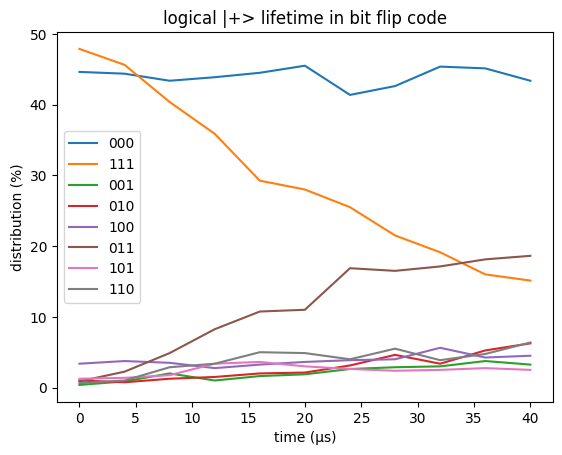

In [41]:

x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in bit flip code')
plt.legend()

# Display the plot
plt.show()

In [42]:
corrected_results = []
for i in range(len(t_array)):
    meas = results[i]
    res = {}
    res['000'] = sum([meas[k] for k in meas if sum([int(c) for c in k]) <= 1])
    res['111'] = sum([meas[k] for k in meas if sum([int(c) for c in k]) >= 2])
    
    corrected_results.append(res)

delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in ['000', '111']], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(corrected_results[i][s]/100*shots) for s in ['000', '111']], sep='\t ')

 delay (μs)	 000	 111
----------------------------------------------------------------------------------
 0		 395	 405
 4		 398	 402
 8		 401	 399
 12		 393	 407
 16		 411	 389
 20		 425	 375
 24		 408	 392
 28		 433	 367
 32		 459	 341
 36		 467	 333
 40		 459	 341


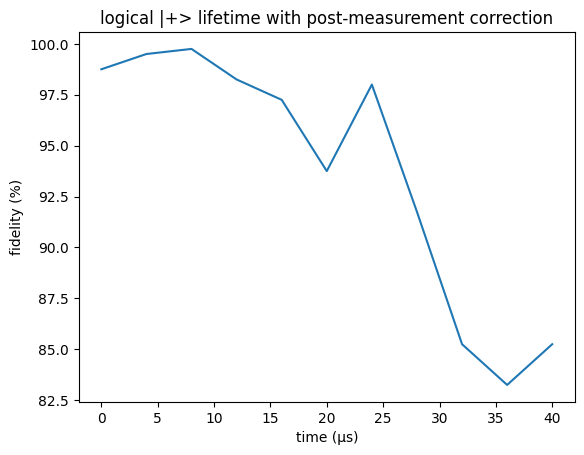

In [43]:
x = delays
# y = {}
# for s in ['000', '111']:
#     y[s] = [r[s] for r in corrected_results]

#     plt.plot(x, y[s], label=f"~{s}")
y = [100-abs(100-2*r['000']) for r in corrected_results]

plt.plot(x, y)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('fidelity (%)')
plt.title('logical |+> lifetime with post-measurement correction')
# plt.legend()

# Display the plot
plt.show()

In [44]:
valid_states = ['000', '111']

TVD

In [45]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


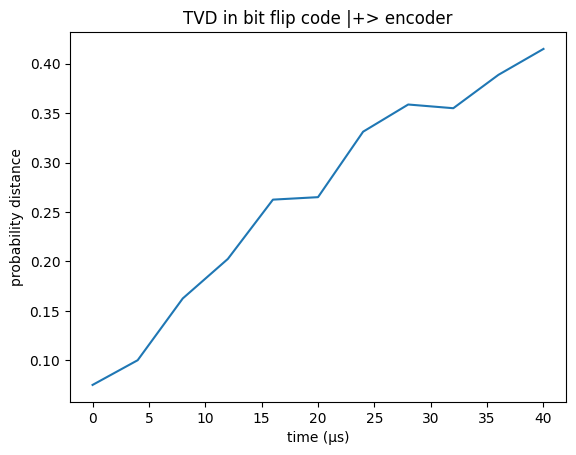

In [48]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in bit flip code |+> encoder')

# Display the plot
plt.show()

In [47]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 7.5%
